# Analysis of Fitbit Charge 2 HR for Sleep and Activity Monitoring

## Preprocessing

In [1]:
from pathlib import Path
import os
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sr = '1T' # 1 minute, downsampling Actiwatch from 30 s to 1 min
recording_period_min = [7, 10]
interpolate_limit = 10 # 10 minute limit

In [3]:
home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

act_files = glob.glob(data_dir + 'actiwatch/act_files/*New_Analysis.csv')
fit_files = glob.glob(data_dir + 'fitbit/*minuteStepsNarrow*.csv')

In [4]:
fit_files

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_minuteStepsNarrow.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10012_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10014_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10016_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_minuteStepsNarrow.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10024_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10025_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitb

In [5]:
act_files

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10011_10_24_2019_4_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10011_11_30_2020_9_00_00_AM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10012_10_18_2019_3_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10014_11_11_2019_5_20_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10016_1_24_2020_11_45_00_AM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10023_11_11_2019_1_50_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10023_11_25_2020_12_00_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10024_11_5_2019_3_15_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiw

In [6]:
act = {}

In [7]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'actiwatch')

for in_file in act_files[0:3]:
    
    record_id = str.split(in_file, "/")[-1][0:5]
    
    if record_id in act:
        record_id = record_id + '_repeat'

    act[record_id] = {}

    for ndays in recording_period_min:
        if in_file.endswith('.csv'):
            act[record_id][str(ndays)] = preproc.preproc(in_file, out_dir, 'actiwatch', sr, ndays, interpolate_limit, truncate=True, write=False)
            np.save(data_dir + '/actiwatch/act_preproc.npy', act)

successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 13 days 23:59:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 13 days 23:59:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 14 days 00:00:00 recording period
successfully read Actiware data file
record 10011
----- saving
----- success: 0 percent NaN, 14 days 00:00:00 recording period
successfully read Actiware data file
record 10012
----- saving
----- success: 0 percent NaN, 13 days 19:40:00 recording period
successfully read Actiware data file
record 10012
----- saving
----- success: 0 percent NaN, 13 days 19:40:00 recording period


In [ ]:
fit = {}

In [ ]:
fit_files

In [ ]:
from wearables import preproc

out_dir = os.path.join(data_dir, 'fitbit')

for in_file in fit_files:
    record_id = str.split(in_file, "/")[-1][3:8]
    print(record_id)
    
    if record_id in fit:
        record_id = record_id + '_repeat'
        
    fit[str(record_id)] = {}

    for ndays in recording_period_min:
        if in_file.endswith('.csv'):
            fit[str(record_id)][str(ndays)] = preproc.preproc(in_file, out_dir, 'fitbit', sr, ndays, interpolate_limit, truncate=True, write=False)
            np.save(data_dir + '/fitbit/fit_preproc.npy', fit)

### Plot preprocessed data

In [9]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

(array([737366.5, 737367. , 737367.5, 737368. , 737368.5, 737369. ,
        737369.5, 737370. , 737370.5]),
 <a list of 9 Text major ticklabel objects>)

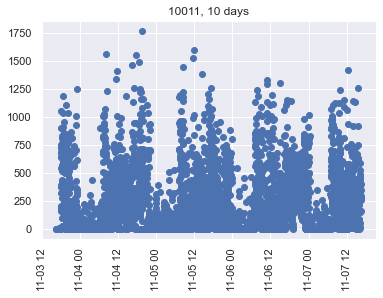

In [19]:
plt.scatter(act['10011']['10'].index, act['10011']['10'])
plt.title('10011' + ', 10 days')
plt.xticks(rotation=90)

In [ ]:
for record_id in act.keys():
    for ndays in act[record_id].keys():
        try:
            plt.scatter(act[record_id][ndays].index, act[record_id][ndays])
            plt.title(record_id + ', ' + ndays + ' days')
            plt.savefig(data_dir + 'actiwatch/figures/' + record_id + '_' + ndays + 'd_preproc_scatter.png', dpi = 300)
            plt.clf()
        except Exception as e:
            print(e)

### Try out shifting data with large missing chunks

In [ ]:
act['10014']['10'].shift()

## Cosinor Analysis

Load saved npy files to save time.

In [8]:
act = np.load(data_dir + '/actiwatch/act_preproc.npy', allow_pickle=True)[()]
fit = np.load(data_dir + '/fitbit/fit_preproc.npy', allow_pickle=True)[()]

In [ ]:
act

In [ ]:
fit['20120']

In [ ]:
cr_measures = ['actmin', 'amp', 'alpha', 'beta', 'phi']
cols = [col + "_" + str(ndays) for ndays in recording_period_min for col in cr_measures]

In [ ]:
str.split(act_files[2], "/")[-1]

In [ ]:
from wearables import fitcosinor

cr_act = pd.DataFrame(index = list(act.keys()), columns = cols)
#index = [str.split(in_file, "/")[-1][0:5] for in_file in act_files]
for record_id in act.keys():
    print(record_id)
    for ndays in act[record_id].keys():
        try:
            cr_act.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(act[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)


In [ ]:
cr_act

In [ ]:
cr_act.to_csv(data_dir + '/actiwatch/cr_act.csv')

In [ ]:
from wearables import fitcosinor

cr_fit = pd.DataFrame(index = list(fit.keys()), columns = cols)
#[str.split(in_file, "/")[-1][3:8] for in_file in fit_files]
for record_id in fit.keys():
    print(record_id)
    for ndays in fit[record_id].keys():
        try:
            cr_fit.loc[record_id]["actmin_" + str(ndays) : "phi_" + str(ndays)] = fitcosinor.fitcosinor(fit[record_id][str(ndays)], transform = 'antilogistic')[0].values[0]
        except Exception as e:
            print(e)


In [ ]:
cr_fit

In [ ]:
cr_fit.to_csv(data_dir + '/fitbit/cr_fit.csv')

## Visualize model fit

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wearables import plotcosinor
import seaborn as sns
sns.set()

d = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_preproc.npy', allow_pickle=True)[()]['10011']['10']
d1 = np.load('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/fit_preproc.npy', allow_pickle=True)[()]['10011']['10']
plotcosinor.plotcosinor(d, 'antilogistic', 'Actiwatch 2.0')
plotcosinor.plotcosinor(d1, 'antilogistic', 'Actiwatch 2.0')




## How much do cosinor measures vary as a function of recording period?

In [ ]:
df = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleeptime_efficiency_device.csv')
df.set_index('subject')
df

In [ ]:
cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv')
cr_fit = cr_fit.join(df[['subject', 'fitbit']])
cr_fit['device'] = cr_fit['fitbit']
cr_fit
cr_act['device'] = 'Actiwatch 2.0'
df1 = pd.concat((cr_act, cr_fit))
df1['subject'] = df1['Unnamed: 0']
df1 = df1.set_index('subject').drop(['Unnamed: 0', 'fitbit'], axis = 1)

In [ ]:
df1

In [ ]:
cr_act.filter(regex=("actmin.*")).mean()

In [ ]:
df1.columns[~df1.columns.str.contains('subject|device')]

In [ ]:
dfmelt = pd.melt(df1.reset_index(), id_vars=['subject','device'], value_vars=df1.columns[~df1.columns.str.contains('subject|device')])
dfmelt['n_days'] = dfmelt['variable'].str.split('_').str[1]
dfmelt['variable'] = dfmelt['variable'].str.split('_').str[0]
dfmelt

In [ ]:
df2 = dfmelt.pivot_table(index=['subject', 'device', 'n_days'], 
                    columns='variable', 
                    values='value').reset_index().set_index('subject')
df2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=.91)

sns.lineplot(x = 'n_days', y = 'amp', hue = 'device', data = df2, ax = ax[0], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Amplitude')
sns.lineplot(x = 'n_days', y = 'phi', hue = 'device', data = df2, ax = ax[1], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Acrophase')
sns.lineplot(x = 'n_days', y = 'actmin', hue = 'device', data = df2, ax = ax[2], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Minimum')
sns.lineplot(x = 'n_days', y = 'alpha', hue = 'device', data = df2, ax = ax[3], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Width')
sns.lineplot(x = 'n_days', y = 'beta', hue = 'device', data = df2, ax = ax[4], ci = None, marker = 'o', palette = 'Set1').set(xlabel = 'Days of Actigraphy', ylabel = 'Slope')


In [ ]:
dfmelt

In [ ]:
dfmelt['variable'].str.split('_')[1][1]

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 1, sharey=False, sharex=False, figsize = (10, 25))
fig.suptitle('Rest-Activity Measures as Function of Number of Days Actigraphy', fontsize = 20, y=0.89)

ax[0].plot(recording_period_min, cr_act.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[0].plot(recording_period_min, cr_fit.filter(regex=("actmin.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[0].set_title("Minimum")
ax[0].set_ylim(0,2)
ax[0].legend()

ax[1].plot(recording_period_min, cr_act.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[1].plot(recording_period_min, cr_fit.filter(regex=("amp.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[1].set_title("Amplitude")
ax[1].set_ylim(0,2)
ax[1].legend()

ax[2].plot(recording_period_min, cr_act.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[2].plot(recording_period_min, cr_fit.filter(regex=("alpha.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[2].set_title("Alpha (Width)")
ax[2].legend()

ax[3].plot(recording_period_min, cr_act.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[3].plot(recording_period_min, cr_fit.filter(regex=("beta.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[3].set_title("Beta (Slope)")
ax[3].legend()

ax[4].plot(recording_period_min, cr_act.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Actiwatch 2.0')
ax[4].plot(recording_period_min, cr_fit.filter(regex=("phi.*")).mean(), '-o', linewidth = 4, label = 'Fitbit Charge 2 HR')
ax[4].set_title("Phi (Acrophase)")
ax[4].legend()

ax[4].set_xlabel('Number of Days', fontsize=16)

plt.subplots_adjust(top=0.85)

